In [1]:
import numpy as np
import matplotlib.pylab as plt
import PIL

In [2]:
class life:
    def __init__(self,*kwargs):
        if len(kwargs)==0:
            size=100
        else:
            size=kwargs[0]
        self.conway=np.zeros((size,size))
    def timestep(self):
        new_co=self.conway.copy()
        for i in range(1,len(self.conway)-1):
            for j in range(1,len(self.conway)-1):
                number=(self.conway[i+1,j]
                            +self.conway[i-1,j]
                            +self.conway[i+1,j+1]
                            +self.conway[i+1,j-1]
                            +self.conway[i-1,j+1]
                            +self.conway[i-1,j-1]
                            +self.conway[i,j+1]
                            +self.conway[i,j-1]
                            )

                if(number==3):
                    new_co[i,j]=1
                elif(number==2 and self.conway[i,j]==1):
                    new_co[i,j]=1
                else:
                    new_co[i,j]=0
        self.conway=new_co
    def timestep2(self):
        number=np.zeros(self.conway.shape)  
        number[1:-1,1:-1]=(self.conway[2:,2:]+self.conway[:-2,:-2]
                          +self.conway[:-2,2:]+self.conway[2:,:-2]
                          +(self.conway[2:,1:-1]+self.conway[:-2,1:-1]
                          +self.conway[1:-1,2:]+self.conway[1:-1,:-2]))

        alive=(self.conway==1)
        dead=(self.conway==0)
        self.conway=np.zeros(self.conway.shape)
        self.conway[alive*(number==2)]=1
        self.conway[alive*(number==3)]=1
        self.conway[dead*(number==3)]=1
               
    def initial_conditions(self,*kwargs):
        print(kwargs,kwargs[0])
        self.conway[kwargs[0],kwargs[1]]=1

([12, 12, 12, 13, 14], [2, 3, 4, 4, 3]) [12, 12, 12, 13, 14]


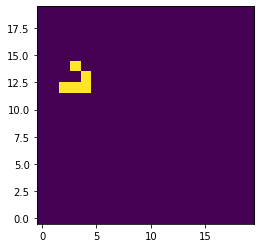

In [3]:
conway=life(20)
x=[12,12,12,13,14]
y=[2,3,4,4,3]
conway.initial_conditions(x,y)
plt.imshow(conway.conway,origin="lower")

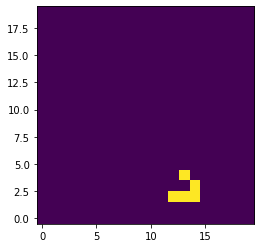

In [4]:
from IPython.display import clear_output
for i in range(40):
    clear_output(wait=True)
    conway.timestep()
    plt.imshow(conway.conway,origin="lower")
    plt.show()

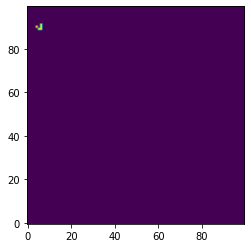

In [5]:
conway=life()
x=[92,92,92,93,94]
y=[2,3,4,4,3]
conway.initial_conditions(x,y)
plt.imshow(conway.conway,origin="lower")
for i in range(10):
    clear_output(wait=True)
    conway.timestep()
    plt.imshow(conway.conway,origin="lower")
    plt.show()

In [6]:
x=np.array([1,1,2,2,11,11,11,12,12,13,13,14,14,15,16,16,17,17,17,18,21,21,21,22,22,22,23,23,25,25,25,25,35,35,36,36])
y=np.array([4,5,4,5,3,4,5,2,6,1,7,1,7,4,2,6,3,4,5,4,5,6,7,5,6,7,4,8,3,4,8,9,6,7,6,7])

(array([19, 20, 19, 20, 18, 19, 20, 17, 21, 16, 22, 16, 22, 19, 17, 21, 18,
       19, 20, 19, 20, 21, 22, 20, 21, 22, 19, 23, 18, 19, 23, 24, 21, 22,
       21, 22]), array([ 1,  1,  2,  2, 11, 11, 11, 12, 12, 13, 13, 14, 14, 15, 16, 16, 17,
       17, 17, 18, 21, 21, 21, 22, 22, 22, 23, 23, 25, 25, 25, 25, 35, 35,
       36, 36])) [19 20 19 20 18 19 20 17 21 16 22 16 22 19 17 21 18 19 20 19 20 21 22 20
 21 22 19 23 18 19 23 24 21 22 21 22]


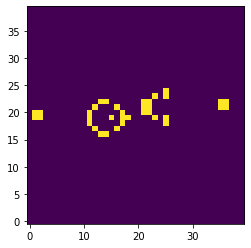

In [7]:
conway=life(40)
conway.initial_conditions(y+15,x)
plt.imshow(conway.conway,origin="lower")

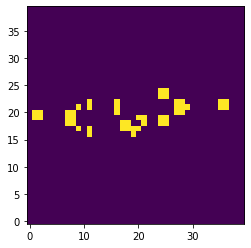

In [8]:
for i in range(1000):
    clear_output(wait=True)
    conway.timestep()
    plt.imshow(conway.conway,origin="lower")
    plt.show()

In [9]:
%timeit conway.timestep()
%timeit conway.timestep2()

5.41 ms ± 98.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
51.2 µs ± 988 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
